# Working with Time Series in Pandas

## Imports

In [9]:
import pandas as pd
import seaborn as sns
from vega_datasets import data
data.sf_temps()
from vega_datasets import data
data.seattle_weather()
from vega_datasets import data
data.flights_20k()
from vega_datasets import data
data.iowa_electricity()
print('youre good')

youre good


## Lesson 

In [3]:
# Use to_datetime function from the pandas module to convert an 
# existing string value to a datetime type
pd.to_datetime('Jan 1 1970')

Timestamp('1970-01-01 00:00:00')

In [4]:
# Figure out the format of the date
try:
    pd.to_datetime('Jan:1:1970')
except ValueError as e:
    print('ValueError', e)

ValueError Unknown string format: Jan:1:1970


In [5]:
# Here we can specify a format string to tell pandas explicitly 
# how to convert this date.
pd.to_datetime('Jan:1:1970', format='%b:%d:%Y')

Timestamp('1970-01-01 00:00:00')

In [14]:
# In addition to single strings, pd.to_datetime will work with entire 
# columns at a time.
from vega_datasets import data
df = data.movies()
df.head()


,Title,US_Gross,Worldwide_Gross,US_DVD_Sales,Production_Budget,Release_Date,MPAA_Rating,Running_Time_min,Distributor,Source,Major_Genre,Creative_Type,Director,Rotten_Tomatoes_Rating,IMDB_Rating,IMDB_Votes
0,The Land Girls,146083.0,146083.0,NaN,8000000.0,Jun 12 1998,R,NaN,Gramercy,None,None,None,None,NaN,6.1,1071.0
1,"First Love, Last Rites",10876.0,10876.0,NaN,300000.0,Aug 07 1998,R,NaN,Strand,None,Drama,None,None,NaN,6.9,207.0
2,I Married a Strange Person,203134.0,203134.0,NaN,250000.0,Aug 28 1998,None,NaN,Lionsgate,None,Comedy,None,None,NaN,6.8,865.0
3,Let's Talk About Sex,373615.0,373615.0,NaN,300000.0,Sep 11 1998,None,NaN,Fine Line,None,Comedy,None,None,13.0,NaN,NaN
4,Slam,1009819.0,1087521.0,NaN,1000000.0,Oct 09 1998,R,NaN,Trimark,Original Screenplay,Drama,Contemporary Fiction,None,62.0,3.4,165.0


In [15]:
print(df.dtypes)

Title                      object
US_Gross                  float64
Worldwide_Gross           float64
US_DVD_Sales              float64
Production_Budget         float64
Release_Date               object
MPAA_Rating                object
Running_Time_min          float64
Distributor                object
Source                     object
Major_Genre                object
Creative_Type              object
Director                   object
Rotten_Tomatoes_Rating    float64
IMDB_Rating               float64
IMDB_Votes                float64
dtype: object


In [16]:
# convert our date column to datetime type
df.Release_Date = pd.to_datetime(df.Release_Date)
df.dtypes

Title                             object
US_Gross                         float64
Worldwide_Gross                  float64
US_DVD_Sales                     float64
Production_Budget                float64
Release_Date              datetime64[ns]
MPAA_Rating                       object
Running_Time_min                 float64
Distributor                       object
Source                            object
Major_Genre                       object
Creative_Type                     object
Director                          object
Rotten_Tomatoes_Rating           float64
IMDB_Rating                      float64
IMDB_Votes                       float64
dtype: object

In [17]:
df.head()

,Title,US_Gross,Worldwide_Gross,US_DVD_Sales,Production_Budget,Release_Date,MPAA_Rating,Running_Time_min,Distributor,Source,Major_Genre,Creative_Type,Director,Rotten_Tomatoes_Rating,IMDB_Rating,IMDB_Votes
0,The Land Girls,146083.0,146083.0,NaN,8000000.0,1998-06-12,R,NaN,Gramercy,None,None,None,None,NaN,6.1,1071.0
1,"First Love, Last Rites",10876.0,10876.0,NaN,300000.0,1998-08-07,R,NaN,Strand,None,Drama,None,None,NaN,6.9,207.0
2,I Married a Strange Person,203134.0,203134.0,NaN,250000.0,1998-08-28,None,NaN,Lionsgate,None,Comedy,None,None,NaN,6.8,865.0
3,Let's Talk About Sex,373615.0,373615.0,NaN,300000.0,1998-09-11,None,NaN,Fine Line,None,Comedy,None,None,13.0,NaN,NaN
4,Slam,1009819.0,1087521.0,NaN,1000000.0,1998-10-09,R,NaN,Trimark,Original Screenplay,Drama,Contemporary Fiction,None,62.0,3.4,165.0


In [19]:
# In addition to the properties listed above, we can use the strftime 
# method and give date string to format the date in a custom way (more on this later).
df['year'] = df.Release_Date.dt.year
df['month'] = df.Release_Date.dt.month
df['day'] = df.Release_Date.dt.day
df['weekday'] = df.Release_Date.dt.day_name()
df.head()

,Title,US_Gross,Worldwide_Gross,US_DVD_Sales,Production_Budget,Release_Date,MPAA_Rating,Running_Time_min,Distributor,Source,Major_Genre,Creative_Type,Director,Rotten_Tomatoes_Rating,IMDB_Rating,IMDB_Votes,year,month,day,weekday
0,The Land Girls,146083.0,146083.0,NaN,8000000.0,1998-06-12,R,NaN,Gramercy,None,None,None,None,NaN,6.1,1071.0,1998,6,12,Friday
1,"First Love, Last Rites",10876.0,10876.0,NaN,300000.0,1998-08-07,R,NaN,Strand,None,Drama,None,None,NaN,6.9,207.0,1998,8,7,Friday
2,I Married a Strange Person,203134.0,203134.0,NaN,250000.0,1998-08-28,None,NaN,Lionsgate,None,Comedy,None,None,NaN,6.8,865.0,1998,8,28,Friday
3,Let's Talk About Sex,373615.0,373615.0,NaN,300000.0,1998-09-11,None,NaN,Fine Line,None,Comedy,None,None,13.0,NaN,NaN,1998,9,11,Friday
4,Slam,1009819.0,1087521.0,NaN,1000000.0,1998-10-09,R,NaN,Trimark,Original Screenplay,Drama,Contemporary Fiction,None,62.0,3.4,165.0,1998,10,9,Friday


In [ ]:
# Once we have a date-time column on a dataframe, we can use that column 
# as the index on our dataframe.


In [20]:
df = df.set_index('Release_Date').sort_index()
df

,Title,US_Gross,Worldwide_Gross,US_DVD_Sales,Production_Budget,MPAA_Rating,Running_Time_min,Distributor,Source,Major_Genre,Creative_Type,Director,Rotten_Tomatoes_Rating,IMDB_Rating,IMDB_Votes,year,month,day,weekday
Release_Date,,,,,,,,,,,,,,,,,,,
1928-12-31,The Broadway Melody,2800000.0,4358000.0,NaN,379000.0,None,NaN,MGM,Original Screenplay,Musical,None,None,38.0,6.7,2017.0,1928,12,31,Monday
1929-12-31,Hell's Angels,NaN,NaN,NaN,4000000.0,None,NaN,None,None,None,None,None,90.0,7.9,2050.0,1929,12,31,Tuesday
1930-12-31,Mata Hari,900000.0,900000.0,NaN,558000.0,None,NaN,MGM,None,None,None,None,NaN,2.2,376.0,1930,12,31,Wednesday
1933-12-31,It Happened One Night,2500000.0,2500000.0,NaN,325000.0,None,NaN,None,None,Romantic Comedy,None,Frank Capra,97.0,8.3,25074.0,1933,12,31,Sunday
1937-12-31,You Can't Take It With You,4000000.0,4000000.0,NaN,1644000.0,None,NaN,None,None,None,None,Frank Capra,96.0,8.0,8597.0,1937,12,31,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2042-11-16,Cat People,4000000.0,8000000.0,NaN,134000.0,None,NaN,RKO Radio Pictures,Original Screenplay,Drama,Fantasy,None,91.0,5.9,6791.0,2042,11,16,Sunday
2043-12-24,A Guy Named Joe,5363000.0,5363000.0,NaN,2627000.0,None,NaN,MGM,Original Screenplay,Drama,None,None,NaN,6.9,869.0,2043,12,24,Thursday
2044-08-01,Wilson,2000000.0,2000000.0,NaN,5200000.0,None,NaN,None,None,None,None,None,NaN,7.0,451.0,2044,8,1,Monday


In [22]:
# First let's take a look at the start and end of our data
df.index.min(), df.index.max()

(Timestamp('1928-12-31 00:00:00'), Timestamp('2046-12-31 00:00:00'))

In [26]:
# With a datetime index we can access specific subsets of the data
df['1999-01']

,Title,US_Gross,Worldwide_Gross,US_DVD_Sales,Production_Budget,MPAA_Rating,Running_Time_min,Distributor,Source,Major_Genre,Creative_Type,Director,Rotten_Tomatoes_Rating,IMDB_Rating,IMDB_Votes,year,month,day,weekday
Release_Date,,,,,,,,,,,,,,,,,,,
1999-01-08,Sticky Fingers of Time,18195.0,20628.0,NaN,250000.0,None,NaN,Strand,None,Thriller/Suspense,None,None,NaN,NaN,NaN,1999,1,8,Friday
1999-01-15,In Dreams,12017369.0,12017369.0,NaN,30000000.0,R,NaN,Dreamworks SKG,Based on Book/Short Story,Horror,Contemporary Fiction,Neil Jordan,22.0,5.3,7138.0,1999,1,15,Friday
1999-01-15,Virus,14010690.0,30626690.0,NaN,75000000.0,R,NaN,Universal,Based on Comic/Graphic Novel,Action,Science Fiction,None,9.0,4.5,10487.0,1999,1,15,Friday
1999-01-15,Mississippi Mermaid,24551.0,2624551.0,NaN,1600000.0,None,NaN,MGM,None,None,None,None,NaN,NaN,NaN,1999,1,15,Friday
1999-01-15,Varsity Blues,52894169.0,54294169.0,NaN,16000000.0,R,104.0,Paramount Pictures,Original Screenplay,Drama,Contemporary Fiction,Brian Robbins,39.0,6.0,18066.0,1999,1,15,Friday
1999-01-15,At First Sight,22365133.0,22365133.0,NaN,40000000.0,PG-13,128.0,MGM,Original Screenplay,Drama,Contemporary Fiction,None,33.0,5.6,6872.0,1999,1,15,Friday
1999-01-22,Bacheha-Ye aseman,925402.0,925402.0,NaN,180000.0,PG,NaN,Miramax,Original Screenplay,Comedy,Contemporary Fiction,None,NaN,8.0,6657.0,1999,1,22,Friday
1999-01-22,Gloria,4167493.0,4967493.0,NaN,30000000.0,R,NaN,Sony Pictures,Remake,Drama,Contemporary Fiction,Sidney Lumet,19.0,4.7,2726.0,1999,1,22,Friday
1999-01-29,She's All That,63465522.0,63465522.0,NaN,10000000.0,PG-13,91.0,Miramax,Original Screenplay,Romantic Comedy,Contemporary Fiction,None,38.0,5.4,28498.0,1999,1,29,Friday


In [27]:
# Note that unlike list slicing syntax, slicing with dates in the example 
# above is inclusive of the upper bound.
df['1999-01-08':'1999-01-16']

,Title,US_Gross,Worldwide_Gross,US_DVD_Sales,Production_Budget,MPAA_Rating,Running_Time_min,Distributor,Source,Major_Genre,Creative_Type,Director,Rotten_Tomatoes_Rating,IMDB_Rating,IMDB_Votes,year,month,day,weekday
Release_Date,,,,,,,,,,,,,,,,,,,
1999-01-08,Sticky Fingers of Time,18195.0,20628.0,NaN,250000.0,None,NaN,Strand,None,Thriller/Suspense,None,None,NaN,NaN,NaN,1999,1,8,Friday
1999-01-15,In Dreams,12017369.0,12017369.0,NaN,30000000.0,R,NaN,Dreamworks SKG,Based on Book/Short Story,Horror,Contemporary Fiction,Neil Jordan,22.0,5.3,7138.0,1999,1,15,Friday
1999-01-15,Virus,14010690.0,30626690.0,NaN,75000000.0,R,NaN,Universal,Based on Comic/Graphic Novel,Action,Science Fiction,None,9.0,4.5,10487.0,1999,1,15,Friday
1999-01-15,Mississippi Mermaid,24551.0,2624551.0,NaN,1600000.0,None,NaN,MGM,None,None,None,None,NaN,NaN,NaN,1999,1,15,Friday
1999-01-15,Varsity Blues,52894169.0,54294169.0,NaN,16000000.0,R,104.0,Paramount Pictures,Original Screenplay,Drama,Contemporary Fiction,Brian Robbins,39.0,6.0,18066.0,1999,1,15,Friday
1999-01-15,At First Sight,22365133.0,22365133.0,NaN,40000000.0,PG-13,128.0,MGM,Original Screenplay,Drama,Contemporary Fiction,None,33.0,5.6,6872.0,1999,1,15,Friday


# Notebook Walkthrough with Ravinder

In [28]:
import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# set figure size
plt.rcParams["figure.figsize"] = (8,6)

# specify decimal places to display
pd.set_option('display.float_format', lambda x: '%.2f' % x)

### Datetime objects in Python, Numpy, and Pandas

#### Native Python dates and times

In [29]:

# Python: datetime module

from datetime import datetime
d = datetime(year=2021, month=4, day=14)
d

datetime.datetime(2021, 4, 14, 0, 0)

In [30]:
# Once you have a datetime object, you can do things like printing the day of the week:

d.strftime('%A')

'Wednesday'

#### Numpy native time series dtype

In [31]:
import numpy as np
date = np.array('2015-07-14', dtype=np.datetime64)
date

array('2015-07-14', dtype='datetime64[D]')

In [33]:
np.arange(5)

array([0, 1, 2, 3, 4])

In [32]:

# Now can quickly do vectorized operations on it!

date + np.arange(5)

array(['2015-07-14', '2015-07-15', '2015-07-16', '2015-07-17',
       '2015-07-18'], dtype='datetime64[D]')

#### Pandas time series data type:
* Timestamp
* 'DatetimeIndex' - Datetime object as Index


In [34]:
t = pd.Timestamp('2021-04-14, 07:50')
t

Timestamp('2021-04-14 07:50:00')

In [35]:
# We can use various attributes of datetime object to figure out day, 
# month, year, weekday etc
t.quarter

2

In [36]:
t.month

4

In [37]:
t.year

2021

### Demo: Working with Timeseries data in pandas

In [38]:
# We will use Ethererum price data from 2017-2020 to demo Pandas capability for time-series data

sheet_url = 'https://docs.google.com/spreadsheets/d/1kTrAFSrr-xP3REs0Lly0TdV4ekrHahBXLg9r5qKxmV8/edit#gid=0'
csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

df = pd.read_csv(csv_export_url)
df.head(10)

,Date,Symbol,Close,Volume
0,2020-03-13 12-PM,ETHUSD,128.71,3906590.52
1,2020-03-13 12-AM,ETHUSD,129.94,10329663.70
2,2020-03-13 11-AM,ETHUSD,119.51,3311080.29
3,2020-03-13 10-AM,ETHUSD,124.47,3483436.48
4,2020-03-13 09-AM,ETHUSD,124.08,2767584.44
5,2020-03-13 08-PM,ETHUSD,124.85,1940673.93
6,2020-03-13 08-AM,ETHUSD,128.39,6808571.23
7,2020-03-13 07-PM,ETHUSD,134.03,7579741.09
8,2020-03-13 07-AM,ETHUSD,131.35,5255468.75
9,2020-03-13 06-PM,ETHUSD,128.93,4898735.81


In [39]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23674 entries, 0 to 23673
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    23674 non-null  object 
 1   Symbol  23674 non-null  object 
 2   Close   23674 non-null  float64
 3   Volume  23674 non-null  float64
dtypes: float64(2), object(2)
memory usage: 739.9+ KB


In [40]:
# check for nulls
df.isnull().sum()

Date      0
Symbol    0
Close     0
Volume    0
dtype: int64

<AxesSubplot:>

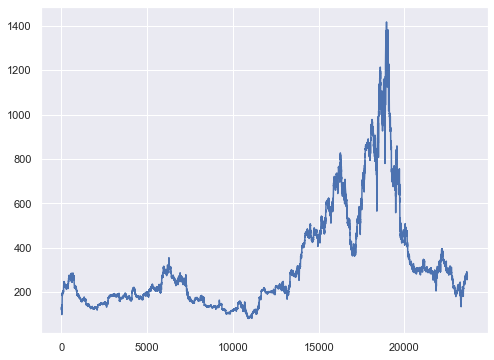

In [41]:
# use pandas .plot()
df.Close.plot()

## Time series analysis: How to make pandas time-aware and leverage inbuild functionality:
1. Convert 'date/time' column to datetime object in Pandas (pd.to_datetime())
2. Set the datetime column as Index
3. Sort the datetime index

In [42]:
# pandas to_datetime method can convert strings/object to datetime object (aka Timestamp object).
# Most of time pandas is smart enough to parse the date without any help.

pd.to_datetime('Jan 1 1970')


Timestamp('1970-01-01 00:00:00')

In [43]:
# Unknown string format error:  when pandas cant figure out the date format
#Sometimes we have to specify the format of the datatime string to help pandas parse the date/time)

pd.to_datetime('2020-03-13 08-PM', format='%Y-%m-%d %I-%p')

Timestamp('2020-03-13 20:00:00')

In [44]:
df.head()

,Date,Symbol,Close,Volume
0,2020-03-13 12-PM,ETHUSD,128.71,3906590.52
1,2020-03-13 12-AM,ETHUSD,129.94,10329663.70
2,2020-03-13 11-AM,ETHUSD,119.51,3311080.29
3,2020-03-13 10-AM,ETHUSD,124.47,3483436.48
4,2020-03-13 09-AM,ETHUSD,124.08,2767584.44


In [45]:
# Step 1: Lets convert the 'Date' column in our df to pandas datetime object using pd.to_datetime()

df.Date = pd.to_datetime(df.Date, format='%Y-%m-%d %I-%p')

In [46]:
# confirm if the 'Date' column is indeed a datetime object now

df.Date

0       2020-03-13 12:00:00
1       2020-03-13 00:00:00
2       2020-03-13 11:00:00
3       2020-03-13 10:00:00
4       2020-03-13 09:00:00
                ...        
23669   2017-07-01 17:00:00
23670   2017-07-01 16:00:00
23671   2017-07-01 15:00:00
23672   2017-07-01 14:00:00
23673   2017-07-01 13:00:00
Name: Date, Length: 23674, dtype: datetime64[ns]

In [47]:

# Step 2 and 3 combined: Set 'Date' column as Index and sort the index:

df = df.set_index('Date').sort_index()


In [49]:

df.head(5)

,Symbol,Close,Volume
Date,,,
2017-07-01 11:00:00,ETHUSD,257.13,679358.87
2017-07-01 12:00:00,ETHUSD,263.12,824362.87
2017-07-01 13:00:00,ETHUSD,275.01,3010787.99
2017-07-01 14:00:00,ETHUSD,274.83,1702536.85
2017-07-01 15:00:00,ETHUSD,268.79,1500282.55


<AxesSubplot:xlabel='Date'>

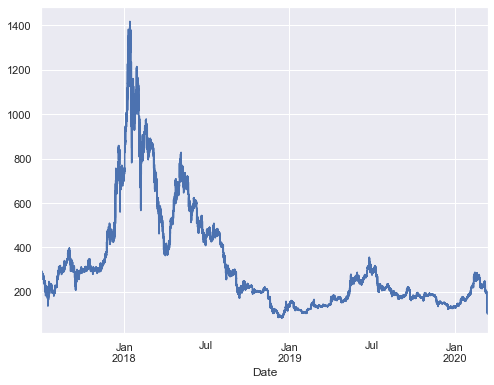

In [50]:
# lets plot the closing price again and how it compares to previous plot

df.Close.plot()

#### Pandas datetimeindex attributes

In [53]:
df.index

DatetimeIndex(['2017-07-01 11:00:00', '2017-07-01 12:00:00',
               '2017-07-01 13:00:00', '2017-07-01 14:00:00',
               '2017-07-01 15:00:00', '2017-07-01 16:00:00',
               '2017-07-01 17:00:00', '2017-07-01 18:00:00',
               '2017-07-01 19:00:00', '2017-07-01 20:00:00',
               ...
               '2020-03-13 11:00:00', '2020-03-13 12:00:00',
               '2020-03-13 13:00:00', '2020-03-13 14:00:00',
               '2020-03-13 15:00:00', '2020-03-13 16:00:00',
               '2020-03-13 17:00:00', '2020-03-13 18:00:00',
               '2020-03-13 19:00:00', '2020-03-13 20:00:00'],
              dtype='datetime64[ns]', name='Date', length=23674, freq=None)

In [54]:
# add a new columns called 'day' which is the 'weekday'

df['day'] = df.index.day_name()

In [55]:

df.head()

,Symbol,Close,Volume,day
Date,,,,
2017-07-01 11:00:00,ETHUSD,257.13,679358.87,Saturday
2017-07-01 12:00:00,ETHUSD,263.12,824362.87,Saturday
2017-07-01 13:00:00,ETHUSD,275.01,3010787.99,Saturday
2017-07-01 14:00:00,ETHUSD,274.83,1702536.85,Saturday
2017-07-01 15:00:00,ETHUSD,268.79,1500282.55,Saturday


In [56]:
# Can I use groupby to see mean trading volume by day:

df.groupby('day').Volume.mean()

day
Friday      2135717.51
Monday      1913387.22
Saturday    1455576.12
Sunday      1453491.59
Thursday    2250669.08
Tuesday     2355954.53
Wednesday   2510755.96
Name: Volume, dtype: float64

### How to choose subset of a dataframe?

In [51]:
# choose rows for '2017-07-01' (show only first 10 values)

df['2017-07-01'][:10]

,Symbol,Close,Volume
Date,,,
2017-07-01 11:00:00,ETHUSD,257.13,679358.87
2017-07-01 12:00:00,ETHUSD,263.12,824362.87
2017-07-01 13:00:00,ETHUSD,275.01,3010787.99
2017-07-01 14:00:00,ETHUSD,274.83,1702536.85
2017-07-01 15:00:00,ETHUSD,268.79,1500282.55
2017-07-01 16:00:00,ETHUSD,265.74,1287300.75
2017-07-01 17:00:00,ETHUSD,272.57,1894983.33
2017-07-01 18:00:00,ETHUSD,268.00,5396852.35
2017-07-01 19:00:00,ETHUSD,263.51,3962669.00


In [ ]:
# we can also use date range

df['2018-02-01':'2018-02-02'].head(10)

### Changing the Period
* Upsampling - increasing frequency

    * This will result in empty observations which you may choose to fill with .ffill(), .bfill(), or some other method.
* Downsampling - reducing frequency

In [57]:

#Upsample

df.asfreq('T', method = None)

,Symbol,Close,Volume,day
Date,,,,
2017-07-01 11:00:00,ETHUSD,257.13,679358.87,Saturday
2017-07-01 11:01:00,NaN,nan,nan,NaN
2017-07-01 11:02:00,NaN,nan,nan,NaN
2017-07-01 11:03:00,NaN,nan,nan,NaN
2017-07-01 11:04:00,NaN,nan,nan,NaN
...,...,...,...,...
2020-03-13 19:56:00,NaN,nan,nan,NaN
2020-03-13 19:57:00,NaN,nan,nan,NaN
2020-03-13 19:58:00,NaN,nan,nan,NaN


#### 
<b> What did we do our dataframe (size?)</b>
<b>Code Description</b>
- D Calendar day
- W Weekly
- M Month end
- Q Quarter end
- A Year end
- H Hours
- T Minutes
- S Seconds
- L Milliseonds
- U Microseconds
- N nanoseconds

In [58]:
# Another example. Now select sample every 45 minutes

df.asfreq('45Min', method = None)

,Symbol,Close,Volume,day
Date,,,,
2017-07-01 11:00:00,ETHUSD,257.13,679358.87,Saturday
2017-07-01 11:45:00,NaN,nan,nan,NaN
2017-07-01 12:30:00,NaN,nan,nan,NaN
2017-07-01 13:15:00,NaN,nan,nan,NaN
2017-07-01 14:00:00,ETHUSD,274.83,1702536.85,Saturday
...,...,...,...,...
2020-03-13 17:00:00,ETHUSD,133.80,2753450.92,Friday
2020-03-13 17:45:00,NaN,nan,nan,NaN
2020-03-13 18:30:00,NaN,nan,nan,NaN


In [59]:
# How can we take care of new NaNs introduced in our data by asfreq method?

# use ffill/padding

df.asfreq('45Min', method = 'ffill')

,Symbol,Close,Volume,day
Date,,,,
2017-07-01 11:00:00,ETHUSD,257.13,679358.87,Saturday
2017-07-01 11:45:00,ETHUSD,257.13,679358.87,Saturday
2017-07-01 12:30:00,ETHUSD,263.12,824362.87,Saturday
2017-07-01 13:15:00,ETHUSD,275.01,3010787.99,Saturday
2017-07-01 14:00:00,ETHUSD,274.83,1702536.85,Saturday
...,...,...,...,...
2020-03-13 17:00:00,ETHUSD,133.80,2753450.92,Friday
2020-03-13 17:45:00,ETHUSD,133.80,2753450.92,Friday
2020-03-13 18:30:00,ETHUSD,128.93,4898735.81,Friday


In [60]:
#  how can we backfill the data:

df.asfreq('45Min', method = 'bfill')

,Symbol,Close,Volume,day
Date,,,,
2017-07-01 11:00:00,ETHUSD,257.13,679358.87,Saturday
2017-07-01 11:45:00,ETHUSD,263.12,824362.87,Saturday
2017-07-01 12:30:00,ETHUSD,275.01,3010787.99,Saturday
2017-07-01 13:15:00,ETHUSD,274.83,1702536.85,Saturday
2017-07-01 14:00:00,ETHUSD,274.83,1702536.85,Saturday
...,...,...,...,...
2020-03-13 17:00:00,ETHUSD,133.80,2753450.92,Friday
2020-03-13 17:45:00,ETHUSD,128.93,4898735.81,Friday
2020-03-13 18:30:00,ETHUSD,134.03,7579741.09,Friday


In [61]:
df.asfreq('45Min', method = None)

,Symbol,Close,Volume,day
Date,,,,
2017-07-01 11:00:00,ETHUSD,257.13,679358.87,Saturday
2017-07-01 11:45:00,NaN,nan,nan,NaN
2017-07-01 12:30:00,NaN,nan,nan,NaN
2017-07-01 13:15:00,NaN,nan,nan,NaN
2017-07-01 14:00:00,ETHUSD,274.83,1702536.85,Saturday
...,...,...,...,...
2020-03-13 17:00:00,ETHUSD,133.80,2753450.92,Friday
2020-03-13 17:45:00,NaN,nan,nan,NaN
2020-03-13 18:30:00,NaN,nan,nan,NaN


In [62]:
# You can aslsdo use fillna to fill NaNs with certain chosen value:

df.asfreq('45min').fillna(0)

,Symbol,Close,Volume,day
Date,,,,
2017-07-01 11:00:00,ETHUSD,257.13,679358.87,Saturday
2017-07-01 11:45:00,0,0.00,0.00,0
2017-07-01 12:30:00,0,0.00,0.00,0
2017-07-01 13:15:00,0,0.00,0.00,0
2017-07-01 14:00:00,ETHUSD,274.83,1702536.85,Saturday
...,...,...,...,...
2020-03-13 17:00:00,ETHUSD,133.80,2753450.92,Friday
2020-03-13 17:45:00,0,0.00,0.00,0
2020-03-13 18:30:00,0,0.00,0.00,0


When to use 'ffill' or 'bfill' or None?

#### What does the code above do to your dataframe content and size?

### Resampling
* Fundamentally data aggregation (similar to groupby but for dates)
    * as opposed to afreq which is more of a 'data selection'
* Only works on dataframes with a datetime index

In [64]:
# resample the whole dataframe every hour using mean as an aggregator

df.resample('D').mean()

,Close,Volume
Date,,
2017-07-01,265.28,2198771.14
2017-07-02,269.78,2177595.32
2017-07-03,278.88,1459014.73
2017-07-04,276.74,1254579.39
2017-07-05,265.03,1797923.44
...,...,...
2020-03-09,200.82,3804751.53
2020-03-10,201.58,1553063.15
2020-03-11,195.91,1894867.73


In [65]:
# resample monthly and use mean for aggregation

df.resample('M').mean().head()

,Close,Volume
Date,,
2017-07-31,220.01,2480603.27
2017-08-31,298.51,2056355.72
2017-09-30,298.52,2331871.43
2017-10-31,305.65,1096152.84
2017-11-30,355.65,2741743.75


In [66]:
# resample yearly

df.resample('Y').mean()

,Close,Volume
Date,,
2017-12-31,351.97,2948844.73
2018-12-31,480.93,2733347.11
2019-12-31,180.75,936000.88
2020-12-31,197.57,1415723.35


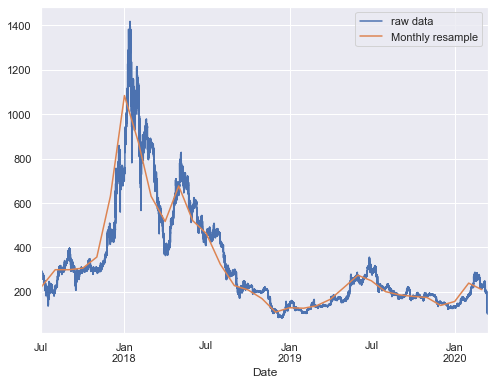

In [67]:
# Plot raw data with monthly resampled data

df.Close.plot(label = 'raw data')
df.resample('M').mean().Close.plot(label = 'Monthly resample')
plt.legend();

### Rolling Averages/Windows¶
* Rolling average aka. moving averages, are generally used to smooth out short-term fluctuations in time series data and highlight long-term trends

In [68]:
df.head()

,Symbol,Close,Volume,day
Date,,,,
2017-07-01 11:00:00,ETHUSD,257.13,679358.87,Saturday
2017-07-01 12:00:00,ETHUSD,263.12,824362.87,Saturday
2017-07-01 13:00:00,ETHUSD,275.01,3010787.99,Saturday
2017-07-01 14:00:00,ETHUSD,274.83,1702536.85,Saturday
2017-07-01 15:00:00,ETHUSD,268.79,1500282.55,Saturday


In [69]:
# What is the rolling average of 4 hours?

df.rolling(4).mean()

,Close,Volume
Date,,
2017-07-01 11:00:00,nan,nan
2017-07-01 12:00:00,nan,nan
2017-07-01 13:00:00,nan,nan
2017-07-01 14:00:00,267.52,1554261.65
2017-07-01 15:00:00,270.44,1759492.56
...,...,...
2020-03-13 16:00:00,118.56,6289262.63
2020-03-13 17:00:00,127.29,4581942.13
2020-03-13 18:00:00,126.79,4873146.86


In [70]:
# Resampling and rolling average together

df.resample('W').mean().Close.rolling(4).mean()

Date
2017-07-02       nan
2017-07-09       nan
2017-07-16       nan
2017-07-23    234.44
2017-07-30    218.21
2017-08-06    209.28
2017-08-13    233.87
2017-08-20    254.66
2017-08-27    284.91
2017-09-03    320.77
2017-09-10    326.64
2017-09-17    319.89
2017-09-24    308.98
2017-10-01    290.96
2017-10-08    286.51
2017-10-15    298.27
2017-10-22    305.65
2017-10-29    305.77
2017-11-05    305.58
2017-11-12    303.15
2017-11-19    308.65
2017-11-26    336.49
2017-12-03    377.38
2017-12-10    415.26
2017-12-17    494.92
2017-12-24    581.13
2017-12-31    648.22
2018-01-07    764.99
2018-01-14    915.76
2018-01-21   1001.19
2018-01-28   1080.09
2018-02-04   1105.63
2018-02-11    990.94
2018-02-18    943.61
2018-02-25    899.22
2018-03-04    858.29
2018-03-11    849.63
2018-03-18    779.19
2018-03-25    696.95
2018-04-01    587.97
2018-04-08    494.49
2018-04-15    452.87
2018-04-22    456.73
2018-04-29    515.01
2018-05-06    601.36
2018-05-13    667.31
2018-05-20    704.05
2018-05-

In [71]:
df.resample('W').mean().Close.rolling(26).mean()

Date
2017-07-02      nan
2017-07-09      nan
2017-07-16      nan
2017-07-23      nan
2017-07-30      nan
2017-08-06      nan
2017-08-13      nan
2017-08-20      nan
2017-08-27      nan
2017-09-03      nan
2017-09-10      nan
2017-09-17      nan
2017-09-24      nan
2017-10-01      nan
2017-10-08      nan
2017-10-15      nan
2017-10-22      nan
2017-10-29      nan
2017-11-05      nan
2017-11-12      nan
2017-11-19      nan
2017-11-26      nan
2017-12-03      nan
2017-12-10      nan
2017-12-17      nan
2017-12-24   334.88
2017-12-31   352.68
2018-01-07   378.21
2018-01-14   418.91
2018-01-21   452.84
2018-01-28   485.27
2018-02-04   516.11
2018-02-11   535.38
2018-02-18   558.83
2018-02-25   579.78
2018-03-04   598.80
2018-03-11   615.84
2018-03-18   629.49
2018-03-25   639.47
2018-04-01   644.50
2018-04-08   647.84
2018-04-15   653.28
2018-04-22   662.71
2018-04-29   676.69
2018-05-06   693.34
2018-05-13   709.30
2018-05-20   723.54
2018-05-27   731.70
2018-06-03   735.81
2018-06-10   74

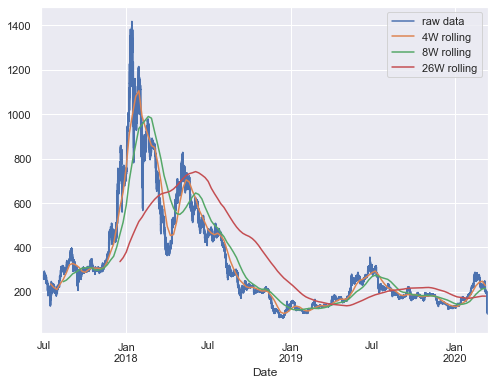

In [72]:
# %matplotlib notebook

df.Close.plot(label = 'raw data' )
df.resample('W').mean().Close.rolling(4).mean().plot(label = '4W rolling')
df.resample('W').mean().Close.rolling(8).mean().plot(label = '8W rolling')
df.resample('W').mean().Close.rolling(26).mean().plot(label = '26W rolling')
plt.legend()

### Lagging and Lead¶
* Shift: move the data backwards and forwards by a given amount
* diff: find the difference with the previous observation (or a specified further back observation)
* Can be used to computing differences over time

In [73]:

df_daily = df.resample('D').mean()
df_daily

,Close,Volume
Date,,
2017-07-01,265.28,2198771.14
2017-07-02,269.78,2177595.32
2017-07-03,278.88,1459014.73
2017-07-04,276.74,1254579.39
2017-07-05,265.03,1797923.44
...,...,...
2020-03-09,200.82,3804751.53
2020-03-10,201.58,1553063.15
2020-03-11,195.91,1894867.73


In [74]:
df_daily['shift(1)'] = df_daily.Close.shift(1)
df_daily.head(10)

,Close,Volume,shift(1)
Date,,,
2017-07-01,265.28,2198771.14,nan
2017-07-02,269.78,2177595.32,265.28
2017-07-03,278.88,1459014.73,269.78
2017-07-04,276.74,1254579.39,278.88
2017-07-05,265.03,1797923.44,276.74
2017-07-06,266.48,962700.63,265.03
2017-07-07,253.94,1801485.06,266.48
2017-07-08,241.55,1356294.00,253.94
2017-07-09,244.81,729444.92,241.55


In [75]:
df_daily['diff(1)'] = df_daily.Close.diff(1)
df_daily.head(10)

,Close,Volume,shift(1),diff(1)
Date,,,,
2017-07-01,265.28,2198771.14,nan,nan
2017-07-02,269.78,2177595.32,265.28,4.50
2017-07-03,278.88,1459014.73,269.78,9.10
2017-07-04,276.74,1254579.39,278.88,-2.14
2017-07-05,265.03,1797923.44,276.74,-11.72
2017-07-06,266.48,962700.63,265.03,1.45
2017-07-07,253.94,1801485.06,266.48,-12.54
2017-07-08,241.55,1356294.00,253.94,-12.39
2017-07-09,244.81,729444.92,241.55,3.27


Text(0.5, 1.0, '1-Year Rate of return on ETH')

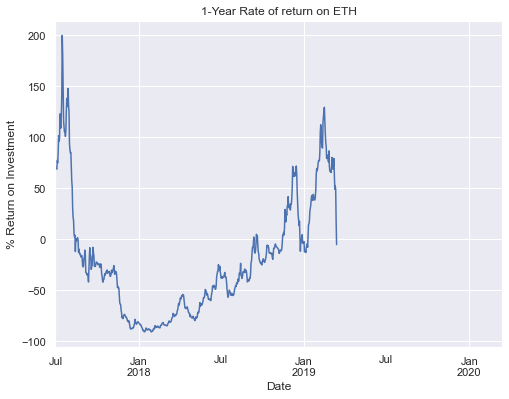

In [76]:
# %matplotlib inline
# Use for shift/diff to calculate 1 year rate of return

((df_daily.Close.shift(-365)/df_daily.Close -1) *100).plot()
plt.ylabel('% Return on Investment')
plt.title('1-Year Rate of return on ETH')

### Time Zone

In [77]:

# datetime with no timezone specified (sometimes called timezone naive datetime object)

t = pd.Timestamp('2020-04-14, 07:50')

In [78]:
#specify timezone

t1 = pd.Timestamp('2020-04-14, 07:50', tz = 'US/Central')
t1

Timestamp('2020-04-14 07:50:00-0500', tz='US/Central')

In [79]:
# What is date and time right now? Take any datetime object and use .now() method

t.now()

Timestamp('2021-04-14 12:10:37.259062')

### Timedelta

In [80]:
# time delta between now (today's date) and t1

(t1.now() - t)

Timedelta('365 days 04:20:37.554378')

In [81]:
# To convert the above Timedelta object to a number:

(t1.now() - t) // pd.Timedelta('1d')

365

In [82]:

# Can we find time delta between t and t1?

t, t1

(Timestamp('2020-04-14 07:50:00'),
 Timestamp('2020-04-14 07:50:00-0500', tz='US/Central'))

### Bonus

In [83]:
# Bonus: How to remove timezone info from a datetime object

t = t.tz_localize(None)
t

Timestamp('2020-04-14 07:50:00')

In [84]:

# Bonus: What is going on here?

pd.Timestamp('2021-03-14 02:00', tz = 'US/Eastern')

NonExistentTimeError: 2021-03-14 02:00:00